In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import subprocess
from glob import glob
                    
from pkg import u,m

# dataset_num = input("Enter dataset number: ")
# dataset = dataset_num.zfill(2) # string (ex '01')
dataset = '01'

pm = u.PathManager(dataset=dataset)
p = u.Processor(paths=pm, dataset=dataset)
clen, photon_energy = p.get_parameters()
print(f"clen: {clen}, photon_energy: {photon_energy}")
p = u.Processor(paths=pm, dataset=dataset)


clen: 1.5, photon_energy: 6000


In [2]:
u.get_counts(pm)
# %run process_directory.py ../../images  --percent_empty 0.4  
u.get_counts(pm)


Paths refreshed for dataset 01.
Directory: peaks/01
  Total files: 54
  Normal images: 39
  Empty images: 15
Directory: labels/01
  Total files: 93
  Normal images: 78
  Empty images: 15
Directory: peaks_water_overlay/01
  Total files: 93
  Normal images: 78
  Empty images: 15
Paths refreshed for dataset 01.
Directory: peaks/01
  Total files: 54
  Normal images: 39
  Empty images: 15
Directory: labels/01
  Total files: 93
  Normal images: 78
  Empty images: 15
Directory: peaks_water_overlay/01
  Total files: 93
  Normal images: 78
  Empty images: 15


In [3]:
dm = u.DatasetManager(paths=pm, dataset=dataset, parameters=(clen, photon_energy), transform=None)

# peak, label, overlay are valid types
u.check_attributes(paths=pm, dataset=dataset, type='peak') 
u.check_attributes(paths=pm, dataset=dataset, type='overlay')
u.check_attributes(paths=pm, dataset=dataset, type='label')

train_loader, test_loader = u.prepare(data_manager=dm, batch_size=10)

Paths refreshed for dataset 01.
Directory: peaks/01
  Total files: 54
  Normal images: 39
  Empty images: 15
Directory: labels/01
  Total files: 93
  Normal images: 78
  Empty images: 15
Directory: peaks_water_overlay/01
  Total files: 93
  Normal images: 78
  Empty images: 15
Paths refreshed for dataset 01.
Actual percentage of empty images: 22.388059701492537% across peaks, water_overlays, and labels directories.

All files in dataset 01 of type 'peak' have matching attributes.


All files in dataset 01 of type 'label' have matching attributes.
All files in dataset 01 of type 'overlay' have matching attributes.
All files in dataset 01 of type 'background' have matching attributes.
Dataset 01 authenticated.

Final dataset sizes - Peaks: 54, Labels: 54, Overlays: 93
All files in dataset 01 of type 'peak' have matching attributes.
All files in dataset 01 of type 'overlay' have matching attributes.
All files in dataset 01 of type 'label' have matching attributes.

Data prepared.
Train size: 43
Test size: 11
Batch size: 10
Number of batches in train_loader: 5 



In [4]:
dir(m)

['BasicCNN1',
 'BasicCNN2',
 'BasicCNN3',
 'DenseNet121_Weights',
 'DenseNetBraggPeakClassifier',
 'F',
 'ResNet50BraggPeakClassifier',
 'ResNet50_Weights',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'models',
 'nn',
 'np',
 'optim',
 'os',
 'torch']

In [5]:
model1 = m.BasicCNN3()
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model1.parameters(), lr=0.001)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

cfg = {
    'num_epochs': 1,
    'num_classes': 2,
    'batch_size': train_loader.batch_size,
    'test_size': len(train_loader.dataset),
    'test_size': len(test_loader.dataset),
    'criterion': criterion,
    'optimizer': optimizer,
    'device': device,
    'model': model1,
}

# # arguments: self, model, loader: list, criterion, optimizer, device, cfg: dict
t = u.TrainTestModels(model=model1, loader=[train_loader, test_loader], criterion=criterion, optimizer=optimizer, device=device, cfg=cfg)

In [6]:
t.epoch_loop()

Model testing and validating: BasicCNN3
-- epoch 0
23
16
24
26
10
Train loss: 0.15663082897663116
Train accuracy: 1.0
Test loss: 0.06265233159065246
Test accuracy: 1.0
-- epoch 1
15
17
33
33
1
Train loss: 0.15663082897663116
Train accuracy: 1.0
Test loss: 0.06265233159065246
Test accuracy: 1.0


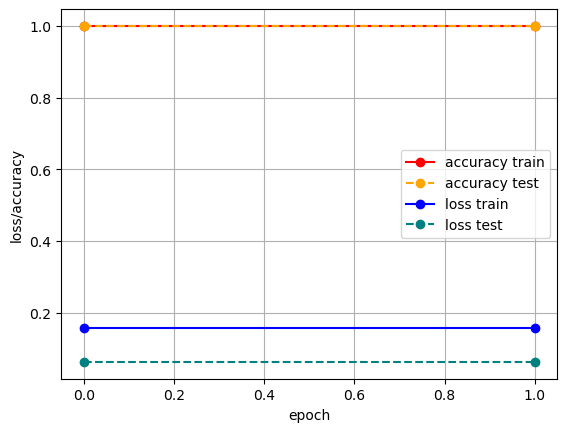

In [7]:
t.plot_loss_accuracy()

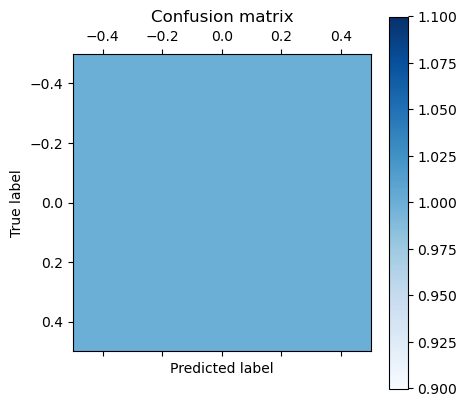

In [8]:
t.plot_confusion_matrix()

In [9]:
t.get_confusion_matrix()

array([[1.]])

In [10]:
# for i, j in test_loader:
#     print(i[0])
#     print(j[9])
#     break

In [11]:
t.save_model("../models/test_model.pt")

In [12]:
t.tensor_board()

NameError: name 'tensorboard_trace_handler' is not defined